# House price prediction using Linear regression



# Basic library

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
#visulazation in proper shape
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

# Importing dataset

In [2]:
%pwd #Present working directory

'C:\\Users\\DS\\Desktop\\linear'

In [3]:
Housing = pd.read_csv('USA_Housing (1).csv')
Housing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
Housing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,4990.000000,5000.000000,4995.000000,4994.000000,5000.000000,5.000000e+03
mean,68584.719991,5.977222,6.987693,3.981874,36163.516039,1.232073e+06
std,10651.192423,0.991456,1.005938,1.234497,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61481.465105,5.322283,6.299156,3.140000,29403.928700,9.975771e+05
50%,68797.671885,5.970429,7.002940,4.050000,36199.406690,1.232669e+06
75%,75779.145465,6.650808,7.665622,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


# Information about variables

In [5]:
Housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              4990 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     4995 non-null   float64
 3   Avg. Area Number of Bedrooms  4994 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


# Data Preprocessing
### 1) Handling missing data - mandatory (because algorithm will not work with missing data)
### 2) Encoding (Char to Num) - only required when variable is significant (understanding and by the help of P-Value)
### 3) Outlier Treatement - Linear Regression problem (it's mandatory)¶
### 4) Feature Scaling - to scale independent variable only (also, please note that if you use gradient descent/KNN/SVM etc then you have to use feature scaling techniques.)¶

In [6]:
# missing value treatment

Housing.isnull().sum()

Avg. Area Income                10
Avg. Area House Age              0
Avg. Area Number of Rooms        5
Avg. Area Number of Bedrooms     6
Area Population                  0
Price                            0
Address                          0
dtype: int64

In [7]:
Housing.isnull().sum()/len(Housing)*100  # take approval from buisness whether to impute the data or remove 

Avg. Area Income                0.20
Avg. Area House Age             0.00
Avg. Area Number of Rooms       0.10
Avg. Area Number of Bedrooms    0.12
Area Population                 0.00
Price                           0.00
Address                         0.00
dtype: float64

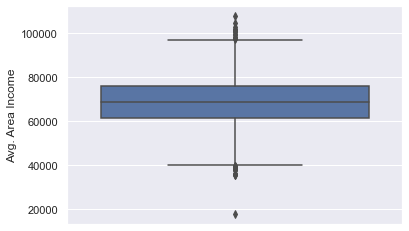

In [8]:
# To impute the data first check whether to impute it with mean or median for that check the outliers . if outliers are present replace with median else go with mean.

sns.boxplot(y='Avg. Area Income' , data = Housing)
plt.show()

In [9]:
Housing['Avg. Area Income'] = Housing['Avg. Area Income'].fillna(Housing['Avg. Area Income'].median())

In [10]:
Housing.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       5
Avg. Area Number of Bedrooms    6
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [11]:
Housing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


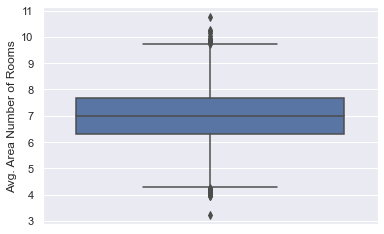

In [12]:
sns.boxplot(y='Avg. Area Number of Rooms' , data = Housing)
plt.show()

In [13]:
Housing['Avg. Area Number of Rooms'] = Housing['Avg. Area Number of Rooms'].fillna(Housing['Avg. Area Number of Rooms'].median())

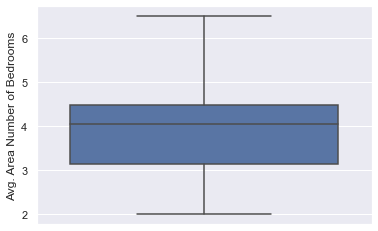

In [14]:
sns.boxplot(y='Avg. Area Number of Bedrooms' , data = Housing)
plt.show()

In [15]:
Housing['Avg. Area Number of Bedrooms'] = Housing['Avg. Area Number of Bedrooms'].fillna(Housing['Avg. Area Number of Bedrooms'].mean())

In [16]:
Housing.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [17]:
Housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


# Encoding
### if you check above cell you will see address parameter dtype is object but here address information is already available hence dropping this column so no need of encoding here

In [18]:
Housing  = Housing.iloc[:,0:-1]

In [19]:
Housing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68585.145895,5.977222,6.987708,3.981874,36163.516039,1.232073e+06
std,10640.538021,0.991456,1.005435,1.233756,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61485.150192,5.322283,6.299692,3.140000,29403.928700,9.975771e+05
50%,68797.671885,5.970429,7.002940,4.050000,36199.406690,1.232669e+06
75%,75766.519103,6.650808,7.665281,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


# Outlier Treatments

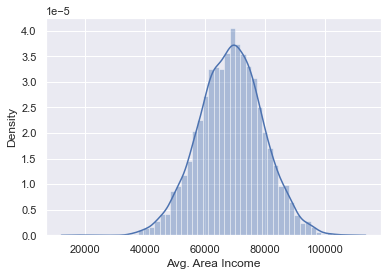

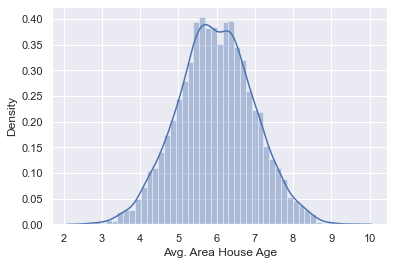

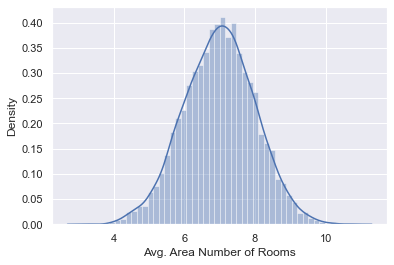

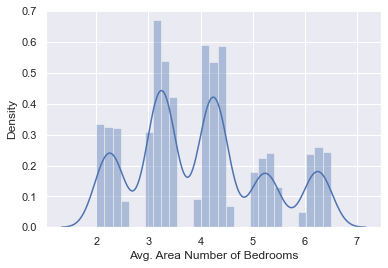

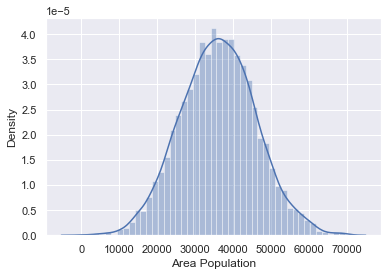

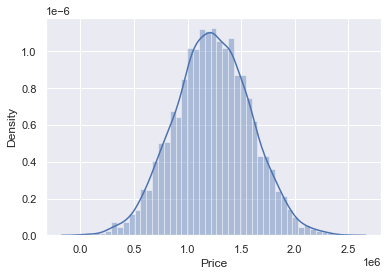

In [20]:
def distplots(col):
    sns.distplot(Housing[col])
    plt.show()
    
for i in list(Housing.columns) [0:]:
    distplots(i)

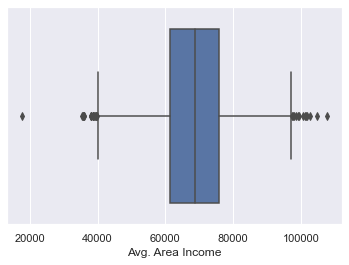

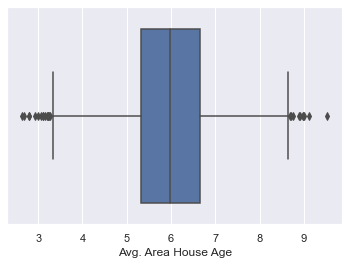

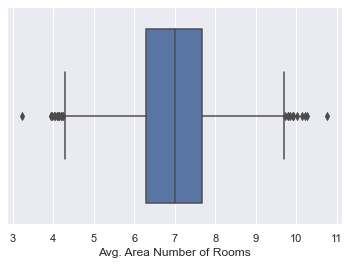

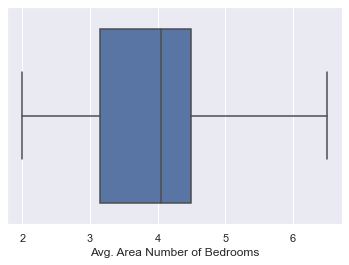

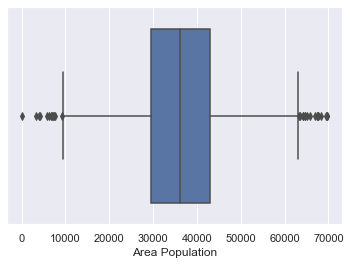

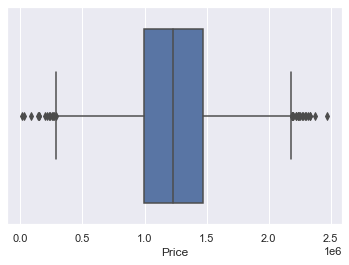

In [21]:
def boxplt(col):
    sns.boxplot(Housing[col])
    plt.show()
    
for i in list(Housing.select_dtypes(exclude=['object']).columns)[0:]:
    boxplt(i)

In [22]:
Housing.dtypes

Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
dtype: object

# From chart we can see that outliers are present in data so need to use capping to handle this outliers
### we will handle the outliers by using box plot and 5 point summery¶
### positive outliers or max value = Q3 + 1.5* IQR (anything beyond this value consider a positive outliers) 
### Negative outliers or min value = Q1 - 1.5* IQR (anything beyond this value consider a negative outliers)

In [23]:
Q1 = Housing.quantile(0.25)
Q3 = Housing.quantile(0.75)
IQR = Q3 - Q1

positive_Outliers = Q3 + 1.5 * IQR
negative_Outliers = Q1 - 1.5 * IQR

print("Q1")
print(Q1)
print("**********************")
print("Q3")
print(Q3)
print("**********************")
print("IQR")
print(IQR)
print("**********************")
print("Positive_Outliers")
print(positive_Outliers)
print("**********************")
print("negative_Outliers")
print(negative_Outliers)
print("**********************")

Q1
Avg. Area Income                 61485.150192
Avg. Area House Age                  5.322283
Avg. Area Number of Rooms            6.299692
Avg. Area Number of Bedrooms         3.140000
Area Population                  29403.928700
Price                           997577.135075
Name: 0.25, dtype: float64
**********************
Q3
Avg. Area Income                7.576652e+04
Avg. Area House Age             6.650808e+00
Avg. Area Number of Rooms       7.665281e+00
Avg. Area Number of Bedrooms    4.490000e+00
Area Population                 4.286129e+04
Price                           1.471210e+06
Name: 0.75, dtype: float64
**********************
IQR
Avg. Area Income                 14281.368910
Avg. Area House Age                  1.328525
Avg. Area Number of Rooms            1.365589
Avg. Area Number of Bedrooms         1.350000
Area Population                  13457.362070
Price                           473633.069425
dtype: float64
**********************
Positive_Outliers
Avg. Area In

# Avg. Area Income 

In [24]:
income_q1 = Housing['Avg. Area Income'].quantile(0.25)
income_q3 = Housing['Avg. Area Income'].quantile(0.75)
income_iqr =income_q3 - income_q1
lower_limit = income_q1 - 1.5*income_iqr
upper_limit = income_q3  + 1.5 * income_iqr

In [25]:
Housing['Avg. Area Income'] = np.where(Housing['Avg. Area Income'] > upper_limit ,upper_limit,
                                       np.where(Housing['Avg. Area Income'] < lower_limit ,lower_limit,
                                                 Housing['Avg. Area Income']))

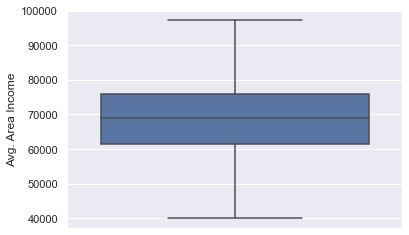

In [26]:
sns.boxplot(y ='Avg. Area Income', data=Housing)
plt.show()

# Avg. Area House Age

In [27]:
income_q1 = Housing['Avg. Area House Age'].quantile(0.25)
income_q3 = Housing['Avg. Area House Age'].quantile(0.75)
income_iqr =income_q3 - income_q1
lower_limit = income_q1 - 1.5*income_iqr
upper_limit = income_q3  + 1.5 * income_iqr

In [28]:
Housing['Avg. Area House Age'] = np.where(Housing['Avg. Area House Age'] > upper_limit, upper_limit,
                                      np.where(Housing['Avg. Area House Age'] < lower_limit,
                                              lower_limit, Housing['Avg. Area House Age']))

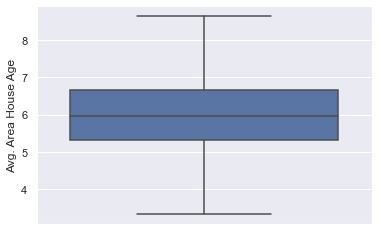

In [29]:
sns.boxplot(y ='Avg. Area House Age', data=Housing)
plt.show()

# Avg. Area Number of Rooms

In [30]:
income_q1 = Housing['Avg. Area Number of Rooms'].quantile(0.25)
income_q3 = Housing['Avg. Area Number of Rooms'].quantile(0.75)
income_iqr =income_q3 - income_q1
lower_limit = income_q1 - 1.5*income_iqr
upper_limit = income_q3  + 1.5 * income_iqr

In [31]:
Housing['Avg. Area Number of Rooms'] = np.where(Housing['Avg. Area Number of Rooms'] > upper_limit, upper_limit,
                                      np.where(Housing['Avg. Area Number of Rooms'] < lower_limit,
                                              lower_limit, Housing['Avg. Area Number of Rooms']))

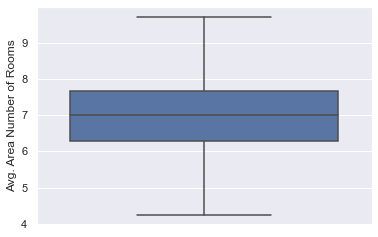

In [32]:
sns.boxplot(y ='Avg. Area Number of Rooms', data=Housing)
plt.show()

# Area Population

In [33]:
income_q1 = Housing['Area Population'].quantile(0.25)
income_q3 = Housing['Area Population'].quantile(0.75)
income_iqr =income_q3 - income_q1
lower_limit = income_q1 - 1.5*income_iqr
upper_limit = income_q3  + 1.5 * income_iqr

In [34]:
Housing['Area Population'] = np.where(Housing['Area Population'] > upper_limit, upper_limit,
                                      np.where(Housing['Area Population'] < lower_limit,
                                              lower_limit, Housing['Area Population']))

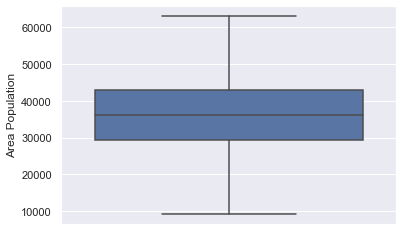

In [35]:
sns.boxplot(y='Area Population',data= Housing)
plt.show()

# Feature scaling 

In [36]:
#for feature scaling first we will divide the data into independent variable x and dependent varianle y
Housing.head(1)


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.8005,1059033.558


In [37]:
x = Housing.iloc[0: ,0:-1]
y = Housing.iloc[: ,-1]

In [38]:
x.head(2)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.45857,5.682861,7.009188,4.09,23086.80050
1,79248.64245,6.002900,6.730821,3.09,40173.07217


In [39]:
y.head(2)

0    1059033.558
1    1505890.915
Name: Price, dtype: float64

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sc_x = scaler.fit_transform(x)
pd.DataFrame(sc_x)

,0,1,2,3,4
0,1.036382,-0.298541,0.021620,0.087648,-1.325622
1,1.008309,0.025747,-0.256381,-0.722966,0.407049
2,-0.690457,-0.113082,1.523179,0.930687,0.073326
3,-0.495800,1.226822,-1.398967,-0.585161,-0.187484
4,-0.813869,-0.949376,0.850726,0.201134,-0.994293
...,...,...,...,...,...
4995,-0.758470,1.877474,-0.849064,-0.423039,-1.350917
4996,0.936679,1.035210,-0.410236,0.030905,-1.069131
4997,-0.491501,1.290004,-2.179585,-1.501155,-0.293363
4998,-0.055437,-0.448985,0.142416,1.181977,0.655755


# It's multiple linear regression, hence we have to check "Multicollinearity"
### The variable should have a robust relationship with independent variables. However, any unbiased variables shouldn’t have robust correlations among other independent variables. Collinearity can be a linear affiliation among explanatory variables. Two variables are perfectly collinear if there’s a particular linear relationship between them. 
Multicollinearity refers to a situation at some stage in which two or greater explanatory variables in the course of a multiple correlation model are pretty linearly related. We’ve perfect multicollinearity if the correlation between impartial variables is good to 1 or -1. In practice, we do not often face ideal multicollinearity for the duration of an information set. More commonly, the difficulty of multicollinearity arises when there’s an approximately linear courting between two or more unbiased variables. 
In easy words, Multicollinearity can be defined as it’s far an event wherein one or greater of the unbiased variables are strongly correlated with one another. In such incidents, we ought to usually use just one in every correlated impartial variable.
VIF(Variance Inflation Factor) is a hallmark of the life of multicollinearity, and statsmodel presents a characteristic to calculate the VIF for each experimental variable and worth of greater than 10 is that the rule of thumb for the possible lifestyles of high multicollinearity. The excellent guiding principle for VIF price is as follows, VIF = 1 manner no correlation exists, VIF > 1, but < 5 then correlation exists.  
 

$V F_{i}=1 / 1-R_{i}^{2}$ where $\mathrm{R}^{2}$ is the coefficient of determination of variable.  


# If VIF is close to 1 means there is no correalation between independent varible if it is below 5 then it is a acceptable region if it is between 5 to 10 then need to consult with buisness to decide dropping of variable .vif above 10 means there is a strong correlation

In [41]:
variable = sc_x
variable.shape

(5000, 5)

In [42]:
# VIF value is more than 5 means there is a multicollinearity there in the features
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable = sc_x
vif = pd.DataFrame()
vif['variance_inflation_factor'] = [variance_inflation_factor(variable, i) for i in range(variable.shape[1])]

vif['Features'] = x.columns

In [43]:
vif

,variance_inflation_factor,Features
0,1.001066,Avg. Area Income
1,1.000593,Avg. Area House Age
2,1.274838,Avg. Area Number of Rooms
3,1.275700,Avg. Area Number of Bedrooms
4,1.001142,Area Population


# Finding correlation
### This will also give the same result as that of the VIF . we can either check the VIF or by plotting heat map we will check the correlation .if the correlation is more than 0.8 then there is a high correlationa and we will drop the variable¶

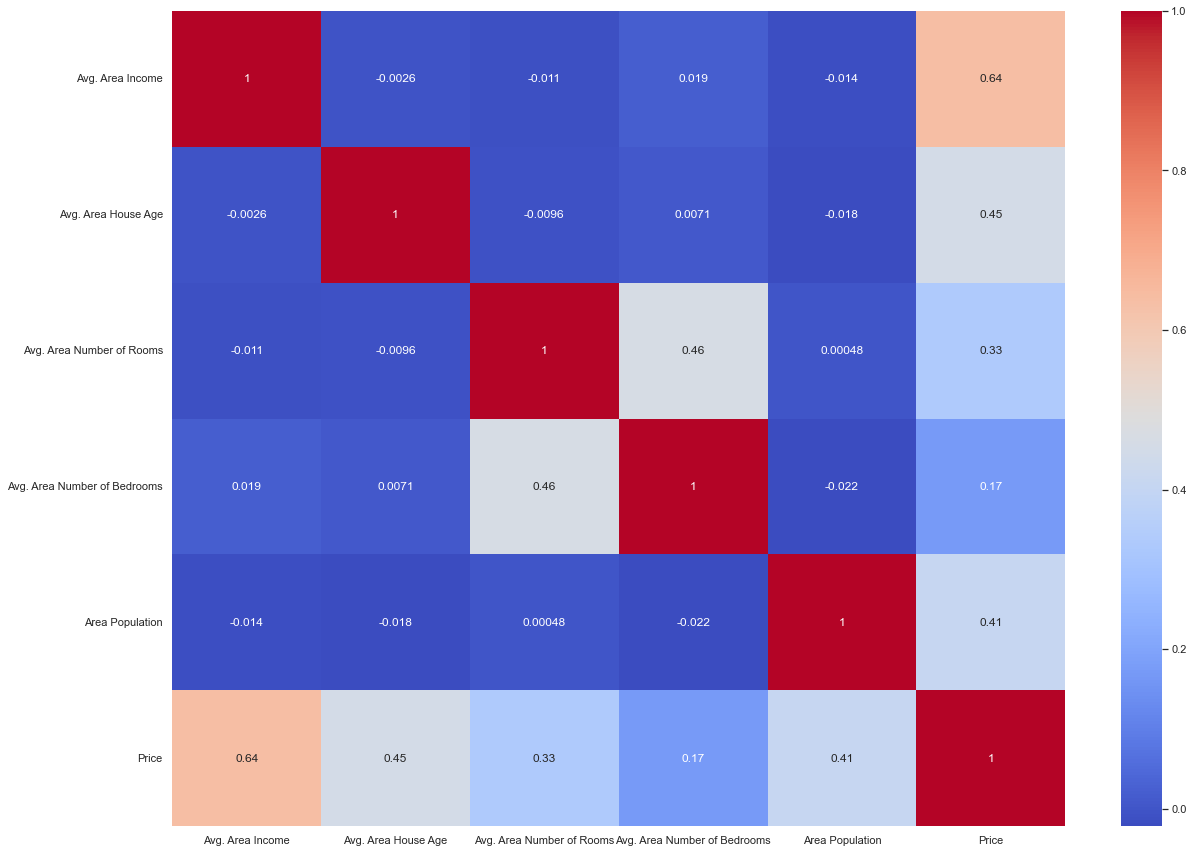

In [44]:
plt.figure(figsize=(20,15))

sns.heatmap(Housing.corr(), annot=True, cmap='coolwarm')
plt.show()

In [45]:
# split the data into training and testing whereas training is for building a model and testing is for predicting and evaluation
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size= 0.2 , random_state = 0)
#random_state will fixed the cell no.

In [46]:
print(x_train.shape)
print(x_test.shape)

(4000, 5)
(1000, 5)


# Building Model - Linear Regression

In [47]:
#Approach no 1 - basic method

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [48]:
print(lm.coef_)

[2.17614093e+01 1.67097451e+05 1.20854863e+05 1.89086080e+03
 1.53789291e+01]


In [49]:
print(lm.intercept_)

-2666909.1146581145


In [50]:
x.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [51]:
x_test

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
398,61200.72618,5.299694,6.234615,4.23,42789.69222
3833,63380.81467,5.344664,6.001574,2.45,40217.33358
4836,71208.26930,5.300326,6.077989,4.01,25696.36174
4572,50343.76352,6.027468,5.160240,4.35,27445.87674
636,54535.45372,5.278065,6.871038,4.41,30852.20701
...,...,...,...,...,...
4228,72472.36674,5.801879,5.374962,2.45,19745.49279
2367,58909.31344,5.714293,7.703920,6.38,40865.81789
788,49424.26712,7.053473,5.110956,2.27,18656.64243
1452,70138.51256,6.319457,6.599789,4.37,33434.11259


# Predict test dataset with linear model

In [52]:
y_pred = lm.predict(x_test)
#y_pred (TO check all the values)

In [53]:
y_pred = lm.predict(x_test)
#y_pred (To check all predicted values)

# Evaluation

In [54]:
from sklearn.metrics import r2_score
print("Accuracy :" ,r2_score(y_test ,y_pred))

Accuracy : 0.9090591517898807


# OLS Method

In [55]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [56]:

reg_model = smf.OLS(endog=y_train , exog=x_train).fit()

In [57]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                          2.145e+04
Date:                Fri, 17 May 2024   Prob (F-statistic):                        0.00
Time:                        11:35:56   Log-Likelihood:                         -55277.
No. Observations:                4000   AIC:                                  1.106e+05
Df Residuals:                    3995   BIC:                                  1.106e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Avg. Area Income                10.2876      0.303     33.993      0.000       9.694      10.881
Avg. Area House Age           5.244e+04   3319.852     15.796      0.000    4.59e+04     5.9e+04
Avg. Area Number of Rooms    -1.128e+04   3645.073     -3.095      0.002   -1.84e+04   -4136.577
Avg. Area Number of Bedrooms  4702.1899   3527.911      1.333      0.183   -2214.484    1.16e+04
Area Population                  8.0586      0.370     21.792      0.000       7.334       8.784
==============================================================================
Omnibus:                        0.196   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.907   Jarque-Bera (JB):                0.166
Skew:                          -0.013   Prob(JB):                        0.920
Kurtosis:                       3.018   Cond. No.                     9.29e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
#Here P value 

In [59]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size= 0.2 , random_state = 0)

In [60]:
x_test

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
398,61200.72618,5.299694,6.234615,4.23,42789.69222
3833,63380.81467,5.344664,6.001574,2.45,40217.33358
4836,71208.26930,5.300326,6.077989,4.01,25696.36174
4572,50343.76352,6.027468,5.160240,4.35,27445.87674
636,54535.45372,5.278065,6.871038,4.41,30852.20701
...,...,...,...,...,...
4228,72472.36674,5.801879,5.374962,2.45,19745.49279
2367,58909.31344,5.714293,7.703920,6.38,40865.81789
788,49424.26712,7.053473,5.110956,2.27,18656.64243
1452,70138.51256,6.319457,6.599789,4.37,33434.11259


In [61]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [62]:
reg_model = smf.OLS(endog=y_train , exog=x_train).fit()

In [63]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                          2.145e+04
Date:                Fri, 17 May 2024   Prob (F-statistic):                        0.00
Time:                        11:36:00   Log-Likelihood:                         -55277.
No. Observations:                4000   AIC:                                  1.106e+05
Df Residuals:                    3995   BIC:                                  1.106e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Avg. Area Income                10.2876      0.303     33.993      0.000       9.694      10.881
Avg. Area House Age           5.244e+04   3319.852     15.796      0.000    4.59e+04     5.9e+04
Avg. Area Number of Rooms    -1.128e+04   3645.073     -3.095      0.002   -1.84e+04   -4136.577
Avg. Area Number of Bedrooms  4702.1899   3527.911      1.333      0.183   -2214.484    1.16e+04
Area Population                  8.0586      0.370     21.792      0.000       7.334       8.784
==============================================================================
Omnibus:                        0.196   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.907   Jarque-Bera (JB):                0.166
Skew:                          -0.013   Prob(JB):                        0.920
Kurtosis:                       3.018   Cond. No.                     9.29e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
#here Avg. Area Number of Bedrooms variable is non-significant basis p-value.(if p-value is higher than 0.05 means confidence level is below 95 so need to drop that variable)

In [65]:
x = x.drop(['Avg. Area Number of Bedrooms'], axis=1)

In [66]:
x.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population
0,79545.45857,5.682861,7.009188,23086.80050
1,79248.64245,6.002900,6.730821,40173.07217
2,61287.06718,5.865890,8.512727,36882.15940
3,63345.24005,7.188236,5.586729,34310.24283
4,59982.19723,5.040555,7.839388,26354.10947


In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [68]:
reg_model = smf.OLS(endog = y_train, exog=x_train).fit()
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                          2.680e+04
Date:                Fri, 17 May 2024   Prob (F-statistic):                        0.00
Time:                        11:36:04   Log-Likelihood:                         -55278.
No. Observations:                4000   AIC:                                  1.106e+05
Df Residuals:                    3996   BIC:                                  1.106e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Avg. Area Income             10.3008      0.303     34.052      0.000       9.708      10.894
Avg. Area House Age        5.246e+04   3320.148     15.800      0.000     4.6e+04     5.9e+04
Avg. Area Number of Rooms -8666.5831   3071.658     -2.821      0.005   -1.47e+04   -2644.419
Area Population               8.0411      0.370     21.756      0.000       7.316       8.766
==============================================================================
Omnibus:                        0.177   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.915   Jarque-Bera (JB):                0.161
Skew:                          -0.015   Prob(JB):                        0.922
Kurtosis:                       3.008   Cond. No.                     7.78e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

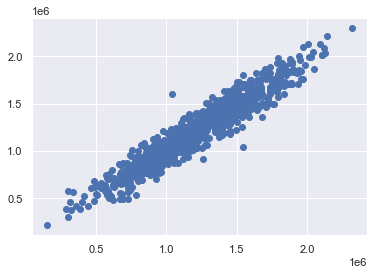

In [69]:
#Checking linearity of dependent variable
plt.scatter(y_test, y_pred)
plt.show()

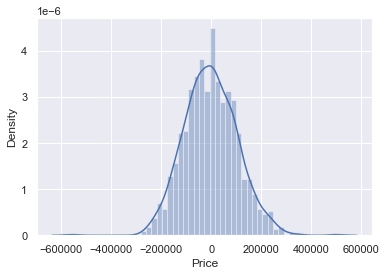

In [70]:
sns.distplot((y_test - y_pred), bins=50)
plt.show()

# Accuracy : Adj. R-squared (uncentered):	0.964
# p-value - all variable are statically significant (p<=0.05)
# Assumption checks
# 1) Multicollinearity - Not found - satisfied
# 2) Endogenity - selected right dependent variable - satisfied
# 3) Hetroscedasticity - already handled outlier (hence, data is homoscadasticity)
# 4) Autocorrelation - Durbin-Watson:	1.979 (p-value <=0.05) - satisfied (no autocorrelation found)
# 5) Check Linearity - satisfied
# 6) Normality of Residual - satisfied

# Regularisation Method¶
1) Lasso - L1 regularization
2) Ridge - L2 regularization 
3) ElasticNet : (L1 + L2) regularization - combination of lasso and ridge

In [71]:
# Lasso method - exact zero or closure to zero (slope/coefficient)
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)
print("Lasso Regularisation", lasso.coef_)

Lasso Regularisation [2.17682212e+01 1.67119371e+05 1.21923779e+05 1.53728284e+01]


In [72]:
y_pred_lasso_train = lasso.predict(x_train)
y_pred_lasso_test = lasso.predict(x_test)

In [73]:
print("Lasso_Train_ACC :", r2_score(y_train, y_pred_lasso_train))
print()
print("Lasso_Test_ACC :", r2_score(y_test, y_pred_lasso_test))

Lasso_Train_ACC : 0.9174417841489105

Lasso_Test_ACC : 0.9090675809238651


# Ridge Regularization (L2)

In [74]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.3)
ridge.fit(x_train, y_train)
print("Ridge Model :", ridge.coef_)

Ridge Model : [2.17682038e+01 1.67106582e+05 1.21914624e+05 1.53727952e+01]


In [75]:
y_pred_ridge_train = ridge.predict(x_train)
y_pred_ridge_test = ridge.predict(x_test)

In [76]:
print("Ridge_Train_ACC :", r2_score(y_train, y_pred_ridge_train))
print()
print("Ridge_Test_ACC :", r2_score(y_test, y_pred_ridge_test))

Ridge_Train_ACC : 0.9174417821784161

Ridge_Test_ACC : 0.9090681939666867


# ElasticNet Regularization (L1 + L2)

In [77]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=0.3, l1_ratio=0.1)
elasticnet.fit(x_train, y_train)

ElasticNet(alpha=0.3, l1_ratio=0.1)

In [78]:
print("Elastic Model :", elasticnet.coef_)

Elastic Model : [2.17184615e+01 1.30792119e+05 9.57563277e+04 1.52786030e+01]


In [79]:
y_pred_elastic_train = elasticnet.predict(x_train)
y_pred_elastic_test = elasticnet.predict(x_test)

In [80]:
print("ElasticNet_Train_ACC :", r2_score(y_train, y_pred_elastic_train))
print()
print("ElasticNet_Test_ACC :", r2_score(y_test, y_pred_elastic_test))

ElasticNet_Train_ACC : 0.901758288938795

ElasticNet_Test_ACC : 0.8952016550808377


# Cross Validation Score - K-Fold method

In [81]:
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(lm, x_train, y_train, cv=10)

In [82]:
print('training_accuracy for all 10 indivisual :', training_accuracy)
print()
print("training_accuracy with mean value :", training_accuracy.mean())
print()
print("training_accuracy max value :", training_accuracy.max())

training_accuracy for all 10 indivisual : [0.92583402 0.92298199 0.92757644 0.9173837  0.91122926 0.90376145
 0.90787634 0.91962723 0.92081829 0.90862776]

training_accuracy with mean value : 0.9165716482072727

training_accuracy max value : 0.9275764395226995
